In [1]:
#importing the libraries

from os import listdir
import os
import numpy as np
from PIL import Image
import shutil
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import csv
import argparse
import scipy.misc

In [2]:
# function to plot bar graph

def plot_bar_graph(label, no_images, title):
    index = np.arange(len(label))
    plt.bar(index, no_images)
    plt.xlabel('Emotions')
    plt.ylabel('No of Images')
    plt.xticks(index, label, rotation=30)
    plt.title(title)
    plt.show()

# Kaggle Dataset
https://www.kaggle.com/c/emotion-detection-from-facial-expressions/data

In [51]:
#Reading emotions from a csv file based on userid
df = pd.read_csv('D:\\Aakash\\Documents\\temp\\emotion detection dataset\\facial expression\\facial_expressions-master\\data\\legend.csv')
print('Total Number of images: ', len(df))

Total Number of images:  13689


In [50]:
df.head()

,user.id,image,emotion
0,628,facial-expressions_2868585k.jpg,surprise
1,628,facial-expressions_2868584k.jpg,disgust
2,628,facial-expressions_2868582k.jpg,fear
3,dwdii,Aaron_Eckhart_0001.jpg,neutral
4,302,Aaron_Guiel_0001.jpg,happiness


In [4]:
#making list of names of all images for separating images

base_path_data = "D:\\Aakash\\Documents\\temp\\emotion detection dataset\\facial expression\\facial_expressions-master\\images"
final_data_path = "D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\Kaggle_dataset"
files_name = listdir(base_path_data)

In [18]:
#Reading from given folder and saving in the corresponding emotion folder
for index, row in df.iterrows():
    im = Image.open(base_path_data + '\\' + row['image'])
    if(row['emotion'] != 'contempt'):
        im.save(final_data_path + '\\' + row['emotion'].lower() + '\\' + row['image'], format='JPEG')

In [16]:
#unique emotions in the images data
df.emotion.unique()

array(['surprise', 'disgust', 'fear', 'neutral', 'happiness', 'sadness',
       'anger', 'contempt', 'NEUTRAL', 'SADNESS', 'DISGUST', 'FEAR',
       'SURPRISE', 'ANGER', 'HAPPINESS'], dtype=object)

In [19]:
#value counts of each emotion in the csv file
df['emotion'].value_counts()

neutral      6717
happiness    5309
HAPPINESS     387
surprise      356
anger         227
DISGUST       195
NEUTRAL       151
SADNESS       144
sadness       124
ANGER          24
fear           13
disgust        13
SURPRISE       12
contempt        9
FEAR            8
Name: emotion, dtype: int64

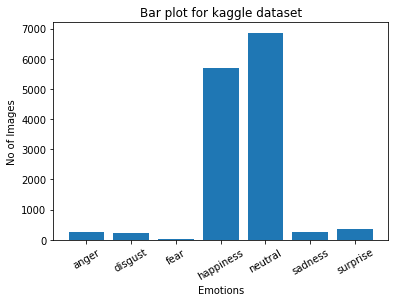

In [6]:
#plotting the bar graph on emotion vs number of images

labels = listdir(final_data_path)
no_images_kaggle = [len(listdir(final_data_path+'\\'+label)) for label in labels]

plot_bar_graph(labels, no_images_kaggle, 'Bar plot for kaggle dataset')

In [7]:
pt = PrettyTable()
pt.field_names = ['Emotion', 'No. of images']
pt.add_row(['Anger', no_images_kaggle[0]])
pt.add_row(['Disgust', no_images_kaggle[1]])
pt.add_row(['Fear', no_images_kaggle[2]])
pt.add_row(['Happiness', no_images_kaggle[3]])
pt.add_row(['Neutral', no_images_kaggle[4]])
pt.add_row(['Sadness', no_images_kaggle[5]])
pt.add_row(['Surprise', no_images_kaggle[6]])

print(pt)

+-----------+---------------+
|  Emotion  | No. of images |
+-----------+---------------+
|   Anger   |      251      |
|  Disgust  |      208      |
|    Fear   |       21      |
| Happiness |      5693     |
|  Neutral  |      6864     |
|  Sadness  |      268      |
|  Surprise |      368      |
+-----------+---------------+


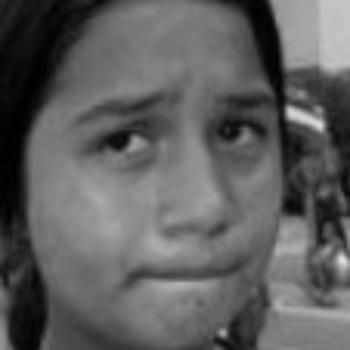

In [106]:
img = Image.open('D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\Kaggle_dataset\\sadness\\Alessandra_Cerna_0001.jpg')
img

# FaceDb Dataset
http://app.visgraf.impa.br/database/faces

The database IMPA-FACE3D was created in 2008 to assist in the research of facial animation. In particular, for analysis and synthesis of faces and expressions. For this purpose, we take as basis the neutral face (i.e. face with the front camera position -0 degrees and without facial expression) and the six universal expressions between human races proposed by Ekman: happiness, sadness, surprise, anger, disgust and fear . The main feature of this dataset is a record of the geometric information with color (i.e., the geometry and texture are correlated).

This dataset includes acquisitions of 38 individuals with a neutral face sample, samples corresponding to six universal facial expressions and other expressions referring to 5 samples containing mouth and eyes open and / or closed. Also two samples were considered corresponding to the lateral profiles of individuals. Altogether, the data set is composed of 22 men and 16 women, with the majority of individuals are aged between 20 and 50 years. 14 samples were acquired for all individuals, summarizing 532 samples in total.

In [8]:
base_path_data = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\facial expression\\facesdb'
final_data_path = "D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\Facial_DB"

In [31]:
# iterating through all the images in the folders and make list of their paths

folders_name = listdir(base_path_data)
files_name = []
files_path_name = []
for i in range(len(folders_name)):
    path = base_path_data + '\\' + folders_name[i] + '\\tif'
    files_name += listdir(path)
    for name in listdir(path):
        files_path_name.append(path + '\\' + name)

In [41]:
# iterating through all the images path and saving in the corresponding emotion folder

for i in range(len(files_name)):
    x = files_name[i].split('-')[1]
    im = Image.open(files_path_name[i])
    if x == '00_img.tif':
        im.save(final_data_path + '\\neutral\\' + files_name[i], format='JPEG')
    if x == '01_img.tif':
        im.save(final_data_path + '\\happiness\\' + files_name[i], format='JPEG')
    if x == '02_img.tif':
        im.save(final_data_path + '\\sadness\\' + files_name[i], format='JPEG')
    if x == '03_img.tif':
        im.save(final_data_path + '\\surprise\\' + files_name[i], format='JPEG')
    if x == '04_img.tif':
        im.save(final_data_path + '\\anger\\' + files_name[i], format='JPEG')
    if x == '05_img.tif':
        im.save(final_data_path + '\\disgust\\' + files_name[i], format='JPEG')
    if x == '06_img.tif':
        im.save(final_data_path + '\\fear\\' + files_name[i], format='JPEG')

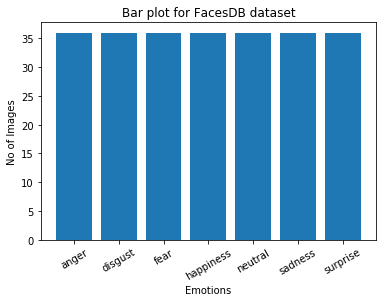

In [9]:
#plotting the bar graph on emotion vs number of images

labels = listdir(final_data_path)
no_images_facialdb = [len(listdir(final_data_path+'\\'+label)) for label in labels]

plot_bar_graph(labels, no_images_facialdb, 'Bar plot for FacesDB dataset')

In [10]:
pt = PrettyTable()
pt.field_names = ['Emotion', 'No. of images']
pt.add_row(['Anger', no_images_facialdb[0]])
pt.add_row(['Disgust', no_images_facialdb[1]])
pt.add_row(['Fear', no_images_facialdb[2]])
pt.add_row(['Happiness', no_images_facialdb[3]])
pt.add_row(['Neutral', no_images_facialdb[4]])
pt.add_row(['Sadness', no_images_facialdb[5]])
pt.add_row(['Surprise', no_images_facialdb[6]])

print(pt)

+-----------+---------------+
|  Emotion  | No. of images |
+-----------+---------------+
|   Anger   |       36      |
|  Disgust  |       36      |
|    Fear   |       36      |
| Happiness |       36      |
|  Neutral  |       36      |
|  Sadness  |       36      |
|  Surprise |       36      |
+-----------+---------------+


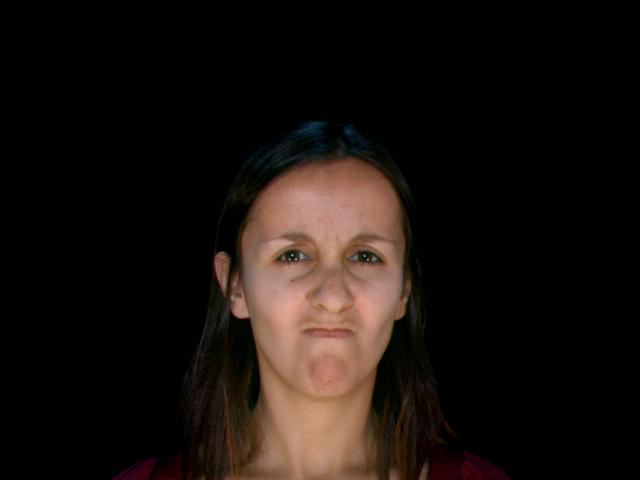

In [105]:
img = Image.open('D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\Facial_DB\\anger\\s001-04_img.tif')
img

# Jaffe Dataset
https://zenodo.org/record/3451524#.XZEEXUYzbIU

The database contains 213 images of 7 facial expressions (6 basic facial expressions + 1 neutral) posed by 10 Japanese female models. Each image has been rated on 6 emotion adjectives by 60 Japanese subjects. The database was planned and assembled by Michael Lyons, Miyuki Kamachi, and Jiro Gyoba.Images are 256x256 gray level, in .tiff format, with no compression. Semantic ratings data on emotion adjectives, averaged over 60 subjects.

In [11]:
base_path_data = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\facial expression\\jaffe'
final_data_path = "D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\Jaffe"

In [102]:
# iterating through all the images path and saving in the corresponding emotion folder

images_present = listdir(base_path_data)
for i in range(len(images_present)):
    x = images_present[i].split('.')[1][0:2]
    im = Image.open(base_path_data + '\\' + images_present[i])
    new_name = images_present[i][:-4] + 'jpg'
    if x == 'NE':
        im.convert('RGB').save(final_data_path + '\\neutral\\' + new_name, format='JPEG')
    if x == 'HA':
        im.convert('RGB').save(final_data_path + '\\happiness\\' + new_name, format='JPEG')
    if x == 'SA':
        im.convert('RGB').save(final_data_path + '\\sadness\\' + new_name, format='JPEG')
    if x == 'SU':
        im.convert('RGB').save(final_data_path + '\\surprise\\' + new_name, format='JPEG')
    if x == 'AN':
        im.convert('RGB').save(final_data_path + '\\anger\\' + new_name, format='JPEG')
    if x == 'DI':
        im.convert('RGB').save(final_data_path + '\\disgust\\' + new_name, format='JPEG')
    if x == 'FE':
        im.convert('RGB').save(final_data_path + '\\fear\\' + new_name, format='JPEG')

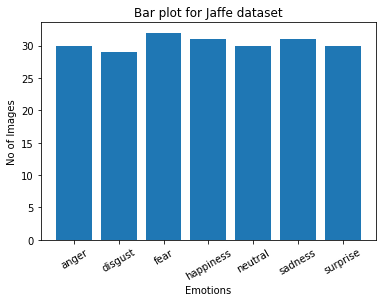

In [12]:
#plotting the bar graph on emotion vs number of images

labels = listdir(final_data_path)
no_images_jaffe = [len(listdir(final_data_path+'\\'+label)) for label in labels]

plot_bar_graph(labels, no_images_jaffe, 'Bar plot for Jaffe dataset')

In [13]:
pt = PrettyTable()
pt.field_names = ['Emotion', 'No. of images']
pt.add_row(['Anger', no_images_jaffe[0]])
pt.add_row(['Disgust', no_images_jaffe[1]])
pt.add_row(['Fear', no_images_jaffe[2]])
pt.add_row(['Happiness', no_images_jaffe[3]])
pt.add_row(['Neutral', no_images_jaffe[4]])
pt.add_row(['Sadness', no_images_jaffe[5]])
pt.add_row(['Surprise', no_images_jaffe[6]])

print(pt)

+-----------+---------------+
|  Emotion  | No. of images |
+-----------+---------------+
|   Anger   |       30      |
|  Disgust  |       29      |
|    Fear   |       32      |
| Happiness |       31      |
|  Neutral  |       30      |
|  Sadness  |       31      |
|  Surprise |       30      |
+-----------+---------------+


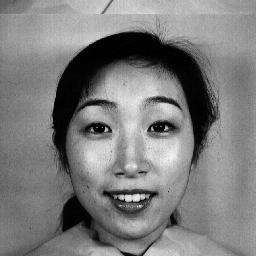

In [107]:
img = Image.open('D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\Jaffe\\happiness\\KA.HA1.29.jpg')
img

# CK+ Dataset
http://www.pitt.edu/~emotion/ck-spread.htm

The Images (cohn-kanade-images.zip) -  there are 593 sequences across 123 subjects which are FACS coded at the peak frame. All sequences are from the neutral face to the peak expression.<br>
The Emotion coded files (Emotion_labels.zip) - ONLY 327 of the 593 sequences have emotion sequences. This is because these are the only ones the fit the prototypic definition. Like the FACS files, there is only 1 Emotion file for each sequence which is the last frame (the peak frame). There should be only one entry and the number will range from 0-7 (i.e. 0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise). N.B there is only 327 files- IF THERE IS NO FILE IT MEANS THAT THERE IS NO EMOTION LABEL (sorry to be explicit but this will avoid confusion).

In [14]:
base_path_images = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\facial expression\\CK+\\cohn-kanade-images'
base_path_labels = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\facial expression\\CK+\\Emotion'
final_data_path = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\CK+'

In [161]:
# iterating through all the images in the folders and make list of their paths

folders = listdir(base_path_images)
images_path = []
images_emotion_path = []
for folder in folders:
    image_folders = listdir(base_path_labels + '\\' + folder)
    for image_folder in image_folders:
        if(image_folder != '.DS_Store'):
            images = listdir(base_path_images + '\\' + folder + '\\' + image_folder)
            if(len(listdir(base_path_labels + '\\' + folder + '\\' + image_folder)) > 0):
                images_path.append(base_path_images + '\\' + folder + '\\' + image_folder + '\\' + images[-1])
                images_emotion_path.append(base_path_labels + '\\' + folder + '\\' + image_folder + '\\' + images[-1][:-4] + '_emotion.txt')

In [175]:
# iterating through all the images path and saving in the corresponding emotion folder

for i in range(len(images_path)):
    # reading the emotion from the corresponding image file
    file = open(images_emotion_path[i], 'r')
    for line in file.readlines():
        x = line.strip()[0]
    im = Image.open(images_path[i])
    new_name = images_path[i].split('\\')[-1][:-3] + 'jpg'
    if x == '0':
        im.save(final_data_path + '\\neutral\\' + new_name, format='JPEG')
    if x == '5':
        im.save(final_data_path + '\\happiness\\' + new_name, format='JPEG')
    if x == '6':
        im.save(final_data_path + '\\sadness\\' + new_name, format='JPEG')
    if x == '7':
        im.save(final_data_path + '\\surprise\\' + new_name, format='JPEG')
    if x == '1':
        im.save(final_data_path + '\\anger\\' + new_name, format='JPEG')
    if x == '3':
        im.save(final_data_path + '\\disgust\\' + new_name, format='JPEG')
    if x == '4':
        im.save(final_data_path + '\\fear\\' + new_name, format='JPEG')
    if x == '2':
        im.save(final_data_path + '\\contempt\\' + new_name, format='JPEG')

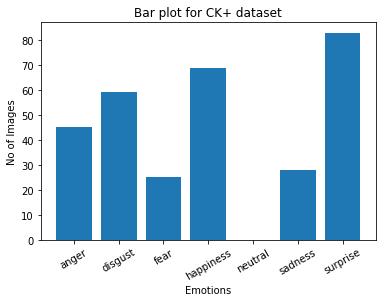

In [15]:
#plotting the bar graph on emotion vs number of images

labels = listdir(final_data_path)
no_images_ck = [len(listdir(final_data_path+'\\'+label)) for label in labels]

plot_bar_graph(labels, no_images_ck, 'Bar plot for CK+ dataset')

In [16]:
pt = PrettyTable()
pt.field_names = ['Emotion', 'No. of images']
pt.add_row(['Anger', no_images_ck[0]])
pt.add_row(['Disgust', no_images_ck[1]])
pt.add_row(['Fear', no_images_ck[2]])
pt.add_row(['Happiness', no_images_ck[3]])
pt.add_row(['Neutral', no_images_ck[4]])
pt.add_row(['Sadness', no_images_ck[5]])
pt.add_row(['Surprise', no_images_ck[6]])

print(pt)

+-----------+---------------+
|  Emotion  | No. of images |
+-----------+---------------+
|   Anger   |       45      |
|  Disgust  |       59      |
|    Fear   |       25      |
| Happiness |       69      |
|  Neutral  |       0       |
|  Sadness  |       28      |
|  Surprise |       83      |
+-----------+---------------+


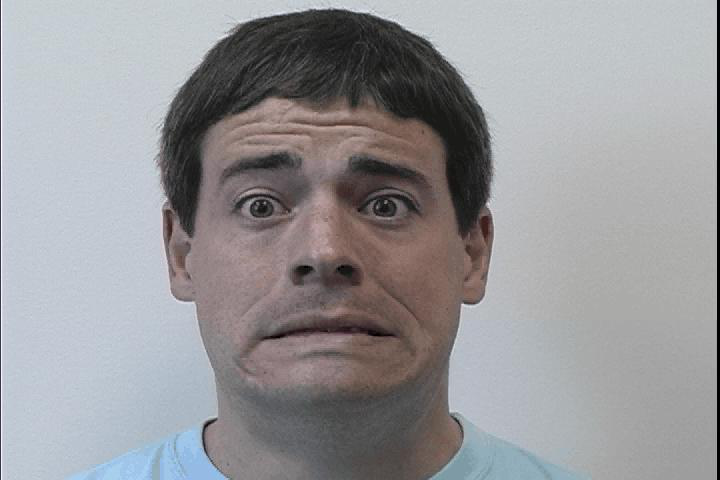

In [108]:
img = Image.open('D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\CK+\\fear\\S506_004_00000038.jpg')
img

# FERG-DB Dataset
https://grail.cs.washington.edu/projects/deepexpr/ferg-db.html

Facial Expression Research Group Database (FERG-DB) is a database of stylized characters with annotated facial expressions. The database contains 55767 annotated face images of six stylized characters. The characters were modeled using the MAYA software and rendered out in 2D to create the images.The database consists of facial expression images of six stylized characters (3 males and 3 females) - aia, bonnie, jules, malcolm, mery and ray. The images for each character are grouped into seven types of expressions - anger, disgust, fear, joy, neutral, sadness and surprise. Figure 1 shows a few sample images from our database.

In [17]:
final_data_path = "D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\Ferg_DB"

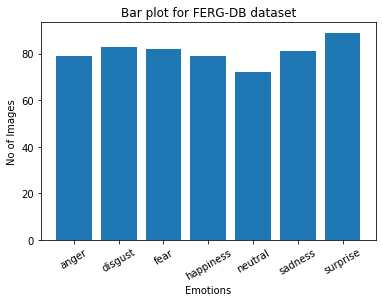

In [18]:
#plotting the bar graph on emotion vs number of images

labels = listdir(final_data_path)
no_images_ferg = [len(listdir(final_data_path+'\\'+label)) for label in labels]

plot_bar_graph(labels, no_images_ferg, 'Bar plot for FERG-DB dataset')

In [19]:
pt = PrettyTable()
pt.field_names = ['Emotion', 'No. of images']
pt.add_row(['Anger', no_images_ferg[0]])
pt.add_row(['Disgust', no_images_ferg[1]])
pt.add_row(['Fear', no_images_ferg[2]])
pt.add_row(['Happiness', no_images_ferg[3]])
pt.add_row(['Neutral', no_images_ferg[4]])
pt.add_row(['Sadness', no_images_ferg[5]])
pt.add_row(['Surprise', no_images_ferg[6]])

print(pt)

+-----------+---------------+
|  Emotion  | No. of images |
+-----------+---------------+
|   Anger   |       79      |
|  Disgust  |       83      |
|    Fear   |       82      |
| Happiness |       79      |
|  Neutral  |       72      |
|  Sadness  |       81      |
|  Surprise |       89      |
+-----------+---------------+


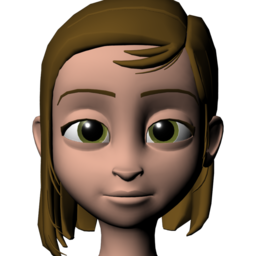

In [110]:
img = Image.open('D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\Ferg_DB\\neutral\\aia_neutral_1075.png')
img

# FER 2013 Dataset 
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

In [2]:
fer_path = 'D:\\Aakash\\Documents\\temp\\fer2013\\fer_images\\Training'
target_path = 'D:\\Aakash\\Documents\\temp\\fer2013'

In [3]:
images = listdir(fer_path)
images_path = [os.path.join(fer_path, img) for img in images]

In [16]:
# iterating through all the images path and saving in the corresponding emotion folder

for i in range(len(images)):
    x = images[i].split('_')[1][0]
    im = Image.open(images_path[i])
    if x == '6':
        im.save(target_path + '\\neutral\\' + images[i], format='JPEG')
    if x == '3':
        im.save(target_path + '\\happiness\\' + images[i], format='JPEG')
    if x == '4':
        im.save(target_path + '\\sadness\\' + images[i], format='JPEG')
    if x == '5':
        im.save(target_path + '\\surprise\\' + images[i], format='JPEG')
    if x == '0':
        im.save(target_path + '\\anger\\' + images[i], format='JPEG')
    if x == '1':
        im.save(target_path + '\\disgust\\' + images[i], format='JPEG')
    if x == '2':
        im.save(target_path + '\\fear\\' + images[i], format='JPEG')

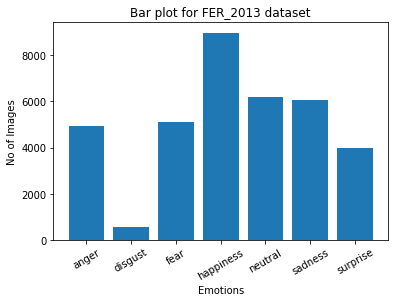

In [20]:
#plotting the bar graph on emotion vs number of images

final_data_path = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final facial dataset\\fer_2013'
labels = listdir(final_data_path)
no_images_fer = [len(listdir(final_data_path+'\\'+label)) for label in labels]

plot_bar_graph(labels, no_images_fer, 'Bar plot for FER_2013 dataset')

In [21]:
pt = PrettyTable()
pt.field_names = ['Emotion', 'No. of images']
pt.add_row(['Anger', no_images_fer[0]])
pt.add_row(['Disgust', no_images_fer[1]])
pt.add_row(['Fear', no_images_fer[2]])
pt.add_row(['Happiness', no_images_fer[3]])
pt.add_row(['Neutral', no_images_fer[4]])
pt.add_row(['Sadness', no_images_fer[5]])
pt.add_row(['Surprise', no_images_fer[6]])

print(pt)

+-----------+---------------+
|  Emotion  | No. of images |
+-----------+---------------+
|   Anger   |      4953     |
|  Disgust  |      547      |
|    Fear   |      5120     |
| Happiness |      8989     |
|  Neutral  |      6198     |
|  Sadness  |      6077     |
|  Surprise |      4002     |
+-----------+---------------+


# All Faces Dataset
By combining all the above mentioned data, we get the final dataset.

In [33]:
final_data_path = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\face dataset'

In [22]:
anger = no_images_kaggle[0]+no_images_facialdb[0]+no_images_jaffe[0]+no_images_ck[0]+no_images_ferg[0]+no_images_fer[0]
disgust = no_images_kaggle[1]+no_images_facialdb[1]+no_images_jaffe[1]+no_images_ck[1]+no_images_ferg[1]+no_images_fer[1]
fear = no_images_kaggle[2]+no_images_facialdb[2]+no_images_jaffe[2]+no_images_ck[2]+no_images_ferg[2]+no_images_fer[2]
happiness = no_images_kaggle[3]+no_images_facialdb[3]+no_images_jaffe[3]+no_images_ck[3]+no_images_ferg[3]+no_images_fer[3]
neutral = no_images_kaggle[4]+no_images_facialdb[4]+no_images_jaffe[4]+no_images_ck[4]+no_images_ferg[4]+no_images_fer[4]
sadness = no_images_kaggle[5]+no_images_facialdb[5]+no_images_jaffe[5]+no_images_ck[5]+no_images_ferg[5]+no_images_fer[5]
surprise = no_images_kaggle[6]+no_images_facialdb[6]+no_images_jaffe[6]+no_images_ck[6]+no_images_ferg[6]+no_images_fer[6]

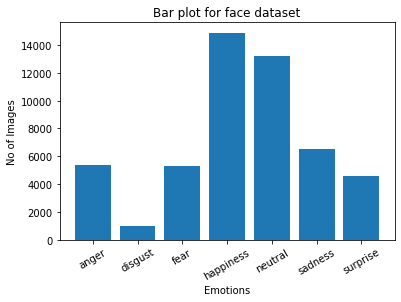

In [23]:
#plotting the bar graph on emotion vs number of images

labels = listdir(final_data_path)
no_images = [anger, disgust, fear, happiness, neutral, sadness, surprise]

plot_bar_graph(labels, no_images, 'Bar plot for face dataset')

In [25]:
pt = PrettyTable()
pt.field_names = ['Emotion', 'No. of images']
pt.add_row(['Anger', no_images[0]])
pt.add_row(['Disgust', no_images[1]])
pt.add_row(['Fear', no_images[2]])
pt.add_row(['Happiness', no_images[3]])
pt.add_row(['Neutral', no_images[4]])
pt.add_row(['Sadness', no_images[5]])
pt.add_row(['Surprise', no_images[6]])

print(pt)

+-----------+---------------+
|  Emotion  | No. of images |
+-----------+---------------+
|   Anger   |      5394     |
|  Disgust  |      962      |
|    Fear   |      5316     |
| Happiness |     14897     |
|  Neutral  |     13200     |
|  Sadness  |      6521     |
|  Surprise |      4608     |
+-----------+---------------+


In [26]:
print('Total number of images: ', sum(no_images))

Total number of images:  50898


__Summary:<br>1. Total number of images from all the datasets are 50898.<br>2. But some emotions have very high number of images than the oters eg. happiness and neutral have total 28097 images(which is more than 50% of all dataset).<br>3. So much variation in datasets leads to a biased model, therefore we should make the dataset uniform.__